In [ ]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the HR data 

pay = pd.read_csv(r"D:\intern\rbi_payment_data_as_on_aug_2019.csv", header=0)

# Copy to back-up file

pay_bk = pay.copy()

# Display first 5 records

pay.head()

,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn
0,November,2011,11,01-11-2011,30-11-2011,Allahabad Bank,207,109,0,0.0,0.0,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.0,102.5
1,November,2011,11,01-11-2011,30-11-2011,Andhra Bank,479,554,2122,0.0,121514.0,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.4,451.1
2,November,2011,11,01-11-2011,30-11-2011,Bank of Baroda,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.7,695.3
3,November,2011,11,01-11-2011,30-11-2011,Bank of India,838,792,1930,501.0,119248.0,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.8,624.8
4,November,2011,11,01-11-2011,30-11-2011,Bank of Maharashtra,359,141,77,404.0,23436.0,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.3,216.1


In [3]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   month                               5592 non-null   object 
 1   year                                5592 non-null   int64  
 2   month_number                        5592 non-null   int64  
 3   start_date                          5592 non-null   object 
 4   end_date                            5592 non-null   object 
 5   bank_name                           5592 non-null   object 
 6   no_atms_on_site                     5592 non-null   int64  
 7   no_atms_off_site                    5592 non-null   int64  
 8   no_pos_on_line                      5592 non-null   int64  
 9   no_pos_off_line                     5591 non-null   float64
 10  no_credit_cards                     5589 non-null   float64
 11  no_credit_card_atm_txn              5592 no

In [4]:
pay.isnull().sum()

month                                 0
year                                  0
month_number                          0
start_date                            0
end_date                              0
bank_name                             0
no_atms_on_site                       0
no_atms_off_site                      0
no_pos_on_line                        0
no_pos_off_line                       1
no_credit_cards                       3
no_credit_card_atm_txn                0
no_credit_card_pos_txn                0
no_credit_card_atm_txn_value_in_mn    0
no_credit_card_pos_txn_value_in_mn    0
no_debit_cards                        0
no_debit_card_atm_txn                 0
no_debit_card_pos_txn                 0
no_debit_card_atm_txn_value_in_mn     0
no_debit_card_pos_txn_value_in_mn     0
dtype: int64

In [5]:
pay['year'].value_counts()

2018    741
2016    672
2015    654
2014    652
2012    639
2013    617
2017    611
2019    517
2011    489
Name: year, dtype: int64

In [6]:
pay['bank_name'].value_counts()

CITY UNION BANK                  65
FEDERAL BANK LTD                 65
ALLAHABAD BANK                   65
CATHOLIC SYRIAN BANK LTD         65
AXIS BANK LTD                    65
                                 ..
Jio Payments Bank                 3
Tamilnad Mercantile Bank Ltd.     2
Bank of America                   2
The Lakshmi Vilas Bank Ltd.       2
Bandhan Bank Ltd                  1
Name: bank_name, Length: 154, dtype: int64

In [7]:
pay = pay.drop(['no_pos_off_line','no_credit_cards'], axis=1)

In [8]:
pay = pay.drop(['month','start_date','end_date','bank_name'], axis=1)

In [9]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                5592 non-null   int64  
 1   month_number                        5592 non-null   int64  
 2   no_atms_on_site                     5592 non-null   int64  
 3   no_atms_off_site                    5592 non-null   int64  
 4   no_pos_on_line                      5592 non-null   int64  
 5   no_credit_card_atm_txn              5592 non-null   int64  
 6   no_credit_card_pos_txn              5592 non-null   int64  
 7   no_credit_card_atm_txn_value_in_mn  5592 non-null   float64
 8   no_credit_card_pos_txn_value_in_mn  5592 non-null   float64
 9   no_debit_cards                      5592 non-null   float64
 10  no_debit_card_atm_txn               5592 non-null   float64
 11  no_debit_card_pos_txn               5592 no

In [10]:
pay['no_credit_card_atm_txn_value_in_mn'] = pay['no_credit_card_atm_txn_value_in_mn'].astype(int)
pay['no_credit_card_pos_txn_value_in_mn'] = pay['no_credit_card_pos_txn_value_in_mn'].astype(int)
pay['no_debit_cards'] = pay['no_debit_cards'].astype(int)
pay['no_debit_card_atm_txn'] = pay['no_debit_card_atm_txn'].astype(int)
pay['no_debit_card_pos_txn'] = pay['no_debit_card_pos_txn'].astype(int)
pay['no_debit_card_atm_txn_value_in_mn'] = pay['no_debit_card_atm_txn_value_in_mn'].astype(int)
pay['no_debit_card_pos_txn_value_in_mn'] = pay['no_debit_card_pos_txn_value_in_mn'].astype(int)

In [11]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   year                                5592 non-null   int64
 1   month_number                        5592 non-null   int64
 2   no_atms_on_site                     5592 non-null   int64
 3   no_atms_off_site                    5592 non-null   int64
 4   no_pos_on_line                      5592 non-null   int64
 5   no_credit_card_atm_txn              5592 non-null   int64
 6   no_credit_card_pos_txn              5592 non-null   int64
 7   no_credit_card_atm_txn_value_in_mn  5592 non-null   int32
 8   no_credit_card_pos_txn_value_in_mn  5592 non-null   int32
 9   no_debit_cards                      5592 non-null   int32
 10  no_debit_card_atm_txn               5592 non-null   int32
 11  no_debit_card_pos_txn               5592 non-null   int32
 12  no_deb

In [12]:
pay.columns

Index(['year', 'month_number', 'no_atms_on_site', 'no_atms_off_site',
       'no_pos_on_line', 'no_credit_card_atm_txn', 'no_credit_card_pos_txn',
       'no_credit_card_atm_txn_value_in_mn',
       'no_credit_card_pos_txn_value_in_mn', 'no_debit_cards',
       'no_debit_card_atm_txn', 'no_debit_card_pos_txn',
       'no_debit_card_atm_txn_value_in_mn',
       'no_debit_card_pos_txn_value_in_mn'],
      dtype='object')

In [13]:
cols=[ 'month_number', 'no_atms_on_site', 
       'no_pos_on_line', 'no_credit_card_atm_txn', 'no_credit_card_pos_txn',
       'no_credit_card_atm_txn_value_in_mn',
       'no_credit_card_pos_txn_value_in_mn', 'no_debit_cards',
       'no_debit_card_atm_txn', 'no_debit_card_pos_txn',
       'no_debit_card_atm_txn_value_in_mn']

In [14]:
pay.head(5)

,year,month_number,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn
0,2011,11,207,109,0,0,0,0,0,1190454,540824,54356,1200,102
1,2011,11,479,554,2122,3243,92370,28,234,6698887,6871864,325458,17775,451
2,2011,11,1242,580,4332,2046,72198,1,190,7307099,6715369,462172,25166,695
3,2011,11,838,792,1930,7824,88123,54,236,8247225,2048888,474882,7048,624
4,2011,11,359,141,77,110,15995,3,36,2286937,2055968,156694,6190,216


In [15]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
pay['year'] = le.fit_transform(pay['year'])

In [16]:
pay['year'].value_counts()

7    741
5    672
4    654
3    652
1    639
2    617
6    611
8    517
0    489
Name: year, dtype: int64

In [17]:
pay['year']=pay['year'].apply(lambda y:1 if y>7 else 0)
pay['year']

0       0
1       0
2       0
3       0
4       0
       ..
5587    1
5588    1
5589    1
5590    1
5591    1
Name: year, Length: 5592, dtype: int64

In [18]:
# Identify the independent and Target variables

IndepVar = []
for col in pay.columns:
    if col != 'year':
        IndepVar.append(col)

TargetVar = 'year'

x = pay[IndepVar]
y = pay[TargetVar]

In [19]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify=y, random_state = 42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((3914, 13), (1678, 13), (3914,), (1678,))

In [20]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

Confusion matrix : 
 [[ 127   28]
 [  35 1488]]
Outcome values : 
 127 28 35 1488
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.82      0.80       155
           0       0.98      0.98      0.98      1523

    accuracy                           0.96      1678
   macro avg       0.88      0.90      0.89      1678
weighted avg       0.96      0.96      0.96      1678

Accuracy : 96.2 %
Precision : 78.4 %
Recall : 81.9 %
F1 Score : 0.801
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 89.8 %
MCC : 0.781
roc_auc_score: 0.898


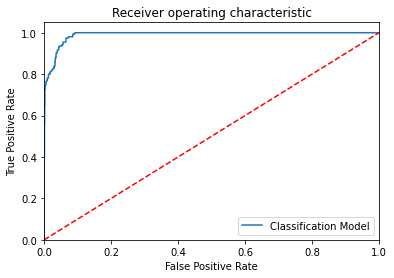

-----------------------------------------------------------------------------------------------------


In [21]:
# Training the lightgbm model on the Training set

import lightgbm as lgb

# Build the model

modelLGB = lgb.LGBMClassifier()

# Fit the model with train data

modelLGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelLGB.predict(x_test)
y_pred_prob = modelLGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelLGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [22]:
# Load the result dataset

HTResults = pd.read_csv(r"D:\intern\HTResults.csv", header=0)
HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   0  155]
 [   0 1523]]
Outcome values : 
 0 155 0 1523
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       155
           0       0.91      1.00      0.95      1523

    accuracy                           0.91      1678
   macro avg       0.45      0.50      0.48      1678
weighted avg       0.82      0.91      0.86      1678

Accuracy : 90.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


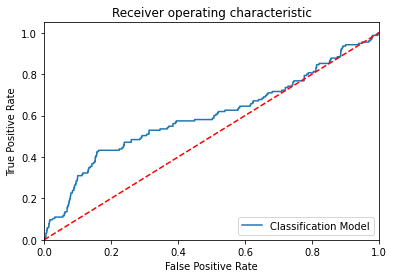

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 115   40]
 [  98 1425]]
Outcome values : 
 115 40 98 1425
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.74      0.62       155
           0       0.97      0.94      0.95      1523

    accuracy                           0.92      1678
   macro avg       0.76      0.84      0.79      1678
weighted avg       0.93      0.92      0.92      1678

Accuracy : 91.8 %
Precision : 54.0 %
Recall : 74.2 %
F1 Score : 0.625
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 83.9 %
MCC : 0.589
roc_auc_score: 0.839


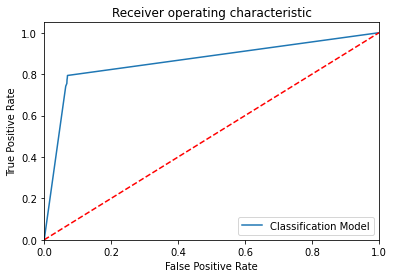

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 120   35]
 [  13 1510]]
Outcome values : 
 120 35 13 1510
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.77      0.83       155
           0       0.98      0.99      0.98      1523

    accuracy                           0.97      1678
   macro avg       0.94      0.88      0.91      1678
weighted avg       0.97      0.97      0.97      1678

Accuracy : 97.1 %
Precision : 90.2 %
Recall : 77.4 %
F1 Score : 0.833
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 88.3 %
MCC : 0.821
roc_auc_score: 0.883


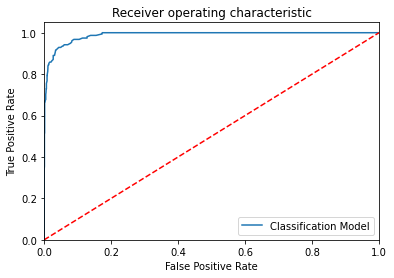

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  97   58]
 [   6 1517]]
Outcome values : 
 97 58 6 1517
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.63      0.75       155
           0       0.96      1.00      0.98      1523

    accuracy                           0.96      1678
   macro avg       0.95      0.81      0.87      1678
weighted avg       0.96      0.96      0.96      1678

Accuracy : 96.2 %
Precision : 94.2 %
Recall : 62.6 %
F1 Score : 0.752
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 81.1 %
MCC : 0.75
roc_auc_score: 0.811


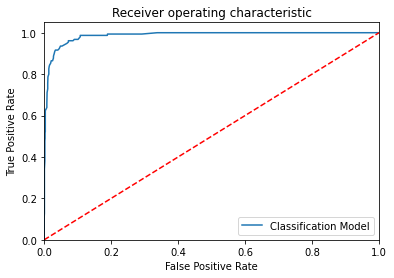

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  40  115]
 [  35 1488]]
Outcome values : 
 40 115 35 1488
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.26      0.35       155
           0       0.93      0.98      0.95      1523

    accuracy                           0.91      1678
   macro avg       0.73      0.62      0.65      1678
weighted avg       0.89      0.91      0.90      1678

Accuracy : 91.1 %
Precision : 53.3 %
Recall : 25.8 %
F1 Score : 0.348
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 61.7 %
MCC : 0.329
roc_auc_score: 0.618


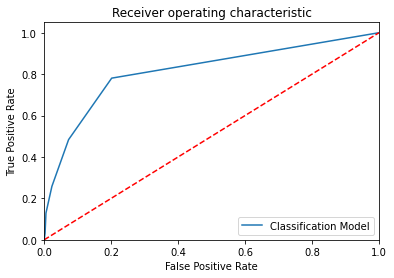

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   0  155]
 [   0 1523]]
Outcome values : 
 0 155 0 1523
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       155
           0       0.91      1.00      0.95      1523

    accuracy                           0.91      1678
   macro avg       0.45      0.50      0.48      1678
weighted avg       0.82      0.91      0.86      1678

Accuracy : 90.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


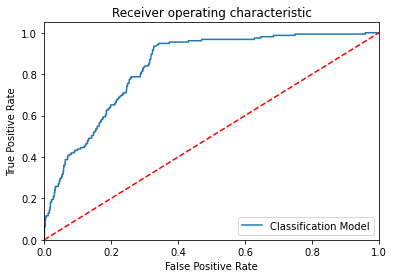

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 119   36]
 [  54 1469]]
Outcome values : 
 119 36 54 1469
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.77      0.73       155
           0       0.98      0.96      0.97      1523

    accuracy                           0.95      1678
   macro avg       0.83      0.87      0.85      1678
weighted avg       0.95      0.95      0.95      1678

Accuracy : 94.6 %
Precision : 68.8 %
Recall : 76.8 %
F1 Score : 0.726
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 86.6 %
MCC : 0.697
roc_auc_score: 0.866


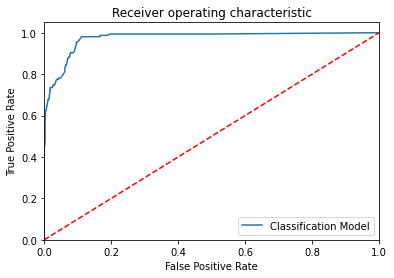

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[  79   76]
 [   7 1516]]
Outcome values : 
 79 76 7 1516
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.51      0.66       155
           0       0.95      1.00      0.97      1523

    accuracy                           0.95      1678
   macro avg       0.94      0.75      0.81      1678
weighted avg       0.95      0.95      0.94      1678

Accuracy : 95.1 %
Precision : 91.9 %
Recall : 51.0 %
F1 Score : 0.656
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 75.2 %
MCC : 0.663
roc_auc_score: 0.753


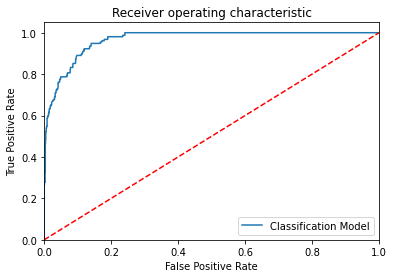

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 127   28]
 [  35 1488]]
Outcome values : 
 127 28 35 1488
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.82      0.80       155
           0       0.98      0.98      0.98      1523

    accuracy                           0.96      1678
   macro avg       0.88      0.90      0.89      1678
weighted avg       0.96      0.96      0.96      1678

Accuracy : 96.2 %
Precision : 78.4 %
Recall : 81.9 %
F1 Score : 0.801
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 89.8 %
MCC : 0.781
roc_auc_score: 0.898


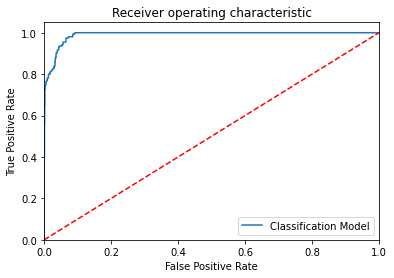

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[   4  151]
 [  83 1440]]
Outcome values : 
 4 151 83 1440
Classification report : 
               precision    recall  f1-score   support

           1       0.05      0.03      0.03       155
           0       0.91      0.95      0.92      1523

    accuracy                           0.86      1678
   macro avg       0.48      0.49      0.48      1678
weighted avg       0.83      0.86      0.84      1678

Accuracy : 86.1 %
Precision : 4.6 %
Recall : 2.6 %
F1 Score : 0.033
Specificity or True Negative Rate : 94.6 %
Balanced Accuracy : 48.6 %
MCC : -0.037
roc_auc_score: 0.486


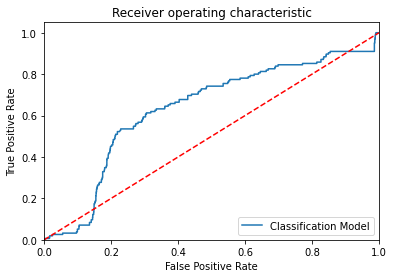

-----------------------------------------------------------------------------------------------------


In [23]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,init=None, random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [24]:
HTResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,155,0,1523,0.908,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,DecisionTreeClassifier(),115,40,98,1425,0.918,0.54,0.742,0.625,0.936,0.589,0.838794,0.839
2,"(DecisionTreeClassifier(max_features='auto', r...",120,35,13,1510,0.971,0.902,0.774,0.833,0.991,0.821,0.882829,0.883
3,"(ExtraTreeClassifier(random_state=2061636481),...",97,58,6,1517,0.962,0.942,0.626,0.752,0.996,0.75,0.810933,0.811
4,KNeighborsClassifier(),40,115,35,1488,0.911,0.533,0.258,0.348,0.977,0.329,0.617542,0.617
5,SVC(probability=True),0,155,0,1523,0.908,NaN,0.0,0.0,1.0,NaN,0.5,0.5
6,(DecisionTreeClassifier(random_state=191910146...,119,36,54,1469,0.946,0.688,0.768,0.726,0.965,0.697,0.866143,0.866
7,([DecisionTreeRegressor(criterion='friedman_ms...,79,76,7,1516,0.951,0.919,0.51,0.656,0.995,0.663,0.752541,0.752
8,LGBMClassifier(),127,28,35,1488,0.962,0.784,0.819,0.801,0.977,0.781,0.898187,0.898
9,GaussianNB(),4,151,83,1440,0.861,0.046,0.026,0.033,0.946,-0.037,0.485654,0.486
